In [1]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=91637e8678ee074dbca06a53825aabe5ade259c2188b17cf0f5b0fc39134a459
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


In [3]:
#Reading the ablone dataset
data = pd.read_csv('https://raw.githubusercontent.com/KodandRam/Expensive-Football-Players-2021/main/players.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Markey Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [4]:
#Dropping S.no column and name column as they aren't significantly needed for our model
data = data.drop(data.columns[[0,1]], axis=1)
df = pd.DataFrame(data)
df.head(10)

,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
5,Centre-Forward,28,90.0,Belgium,Chelsea FC,11,4,0,1,0,0,0,1,2
6,Attacking Midfield,30,90.0,Belgium,Manchester City,14,3,0,1,1,0,0,4,6
7,Left Winger,29,90.0,Brazil,Paris Saint-Germain,11,3,0,3,3,0,0,0,3
8,Left Winger,21,81.0,England,Manchester United,13,0,0,0,0,0,0,7,5
9,Central Midfield,24,81.0,Netherlands,FC Barcelona,13,0,0,2,2,1,0,0,2


# DATA TYPES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Position                     500 non-null    object 
 1   Age                          500 non-null    int64  
 2   Markey Value In Millions(£)  500 non-null    float64
 3   Country                      500 non-null    object 
 4   Club                         500 non-null    object 
 5   Matches                      500 non-null    int64  
 6   Goals                        500 non-null    int64  
 7   Own Goals                    500 non-null    int64  
 8   Assists                      500 non-null    int64  
 9   Yellow Cards                 500 non-null    int64  
 10  Second Yellow Cards          500 non-null    int64  
 11  Red Cards                    500 non-null    int64  
 12  Number Of Substitute In      500 non-null    int64  
 13  Number Of Substitute

# MISSING VALUES

In [6]:
df.isnull().sum()

Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

# Label Encoder for categorical data types

In [7]:
# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Position'])

# transform the categorical values to numeric
df['Position'] = le.transform(df['Position'])

In [8]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Country'])

# transform the categorical values to numeric
df['Country'] = le.transform(df['Country'])

In [9]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Club'])

# transform the categorical values to numeric
df['Club'] = le.transform(df['Club'])

In [10]:
df.head()

,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,3,22,144.0,17,50,16,7,0,11,3,0,0,0,8
1,3,21,135.0,36,14,10,13,0,4,1,0,0,0,1
2,3,28,108.0,16,69,16,7,0,2,2,0,0,2,2
3,7,26,90.0,16,42,15,2,0,3,1,0,0,2,8
4,10,29,90.0,15,41,15,15,0,6,1,0,0,0,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Position                     500 non-null    int64  
 1   Age                          500 non-null    int64  
 2   Markey Value In Millions(£)  500 non-null    float64
 3   Country                      500 non-null    int64  
 4   Club                         500 non-null    int64  
 5   Matches                      500 non-null    int64  
 6   Goals                        500 non-null    int64  
 7   Own Goals                    500 non-null    int64  
 8   Assists                      500 non-null    int64  
 9   Yellow Cards                 500 non-null    int64  
 10  Second Yellow Cards          500 non-null    int64  
 11  Red Cards                    500 non-null    int64  
 12  Number Of Substitute In      500 non-null    int64  
 13  Number Of Substitute

# DISTRIBUTION FOR NUMERIC VALUE

<Figure size 800x500 with 0 Axes>

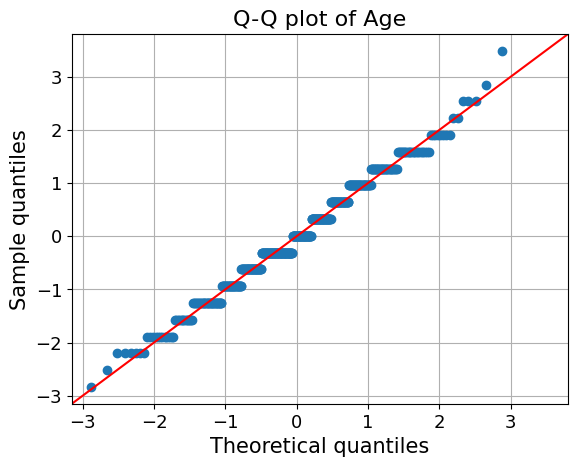

<Figure size 800x500 with 0 Axes>

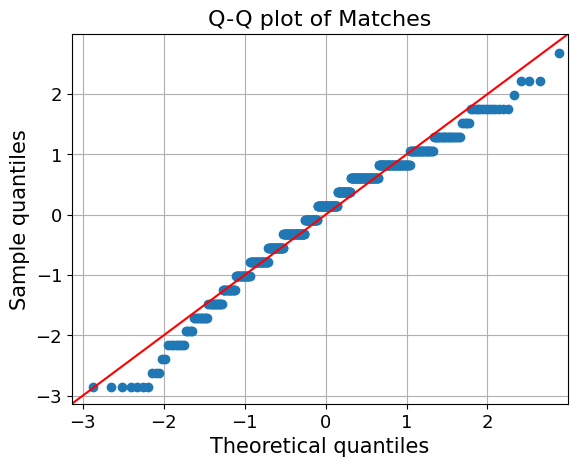

<Figure size 800x500 with 0 Axes>

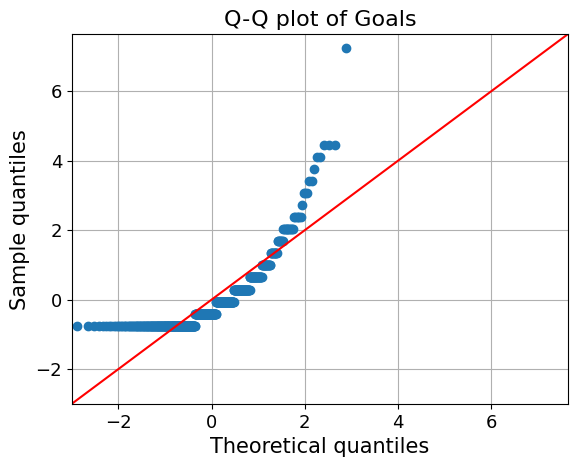

<Figure size 800x500 with 0 Axes>

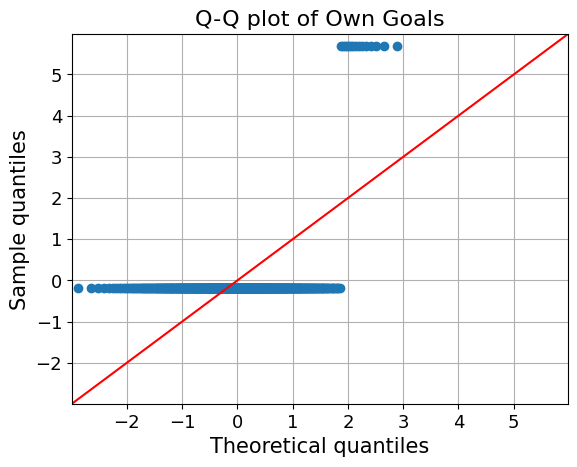

<Figure size 800x500 with 0 Axes>

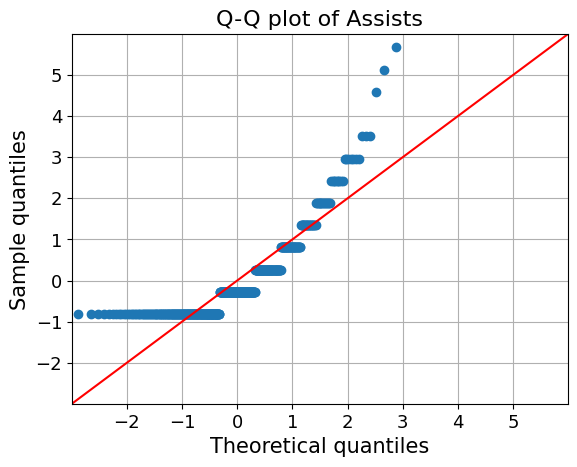

<Figure size 800x500 with 0 Axes>

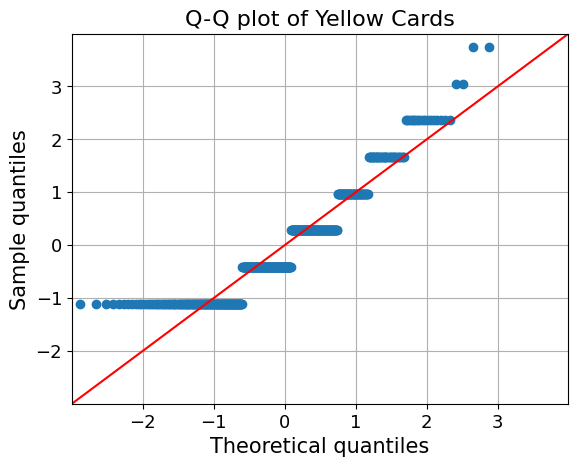

<Figure size 800x500 with 0 Axes>

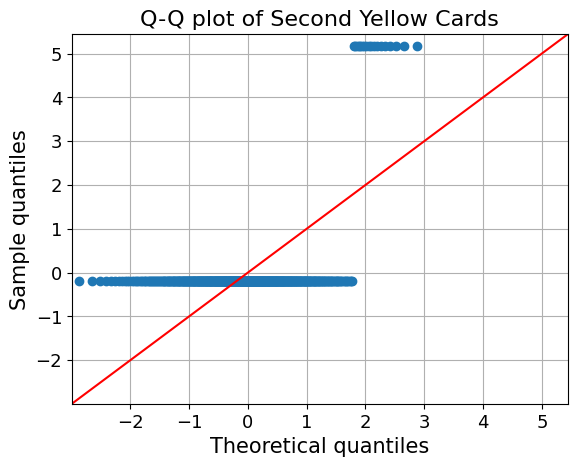

<Figure size 800x500 with 0 Axes>

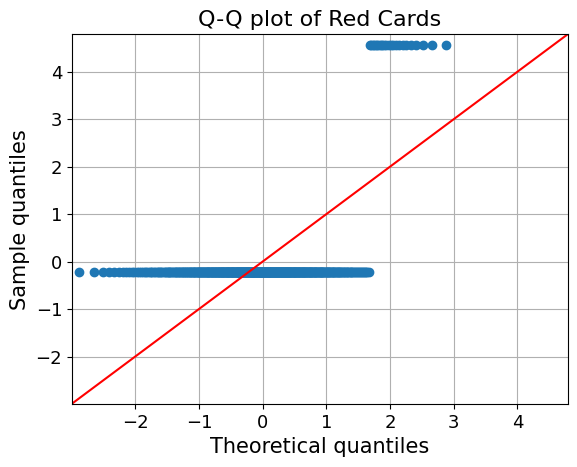

<Figure size 800x500 with 0 Axes>

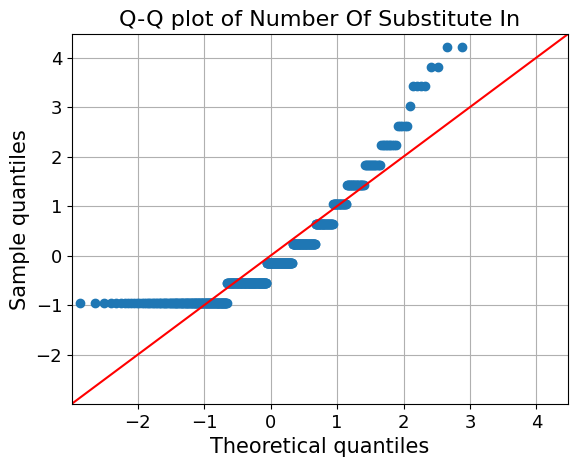

<Figure size 800x500 with 0 Axes>

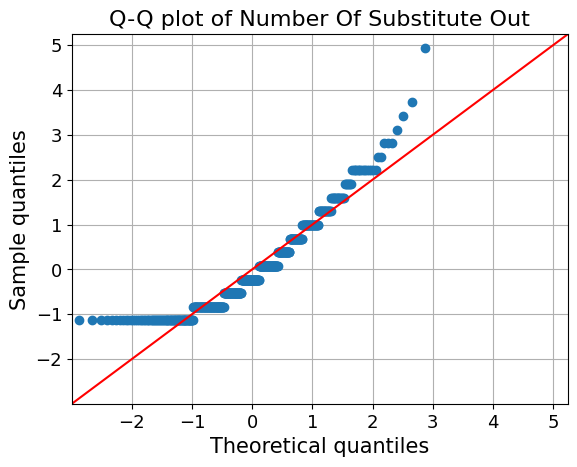

In [12]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

###Interpretation of QQ Plot

Q-Q plot is used to check the distribution of independent variables in the data set of the most expensive footballers 2021 players. The independent variables are Age, Matches, Goals, Own Goals, Assists, Yellow Cards, Second Yellow Cards, Red Cards, Number Of Substitute In, and Number Of Substitute Out.


The interpretation of each Q-Q plot can help identify whether the data set is normally distributed or not. If the data set is normally distributed, the points on the plot will follow the 45-degree line closely. If the data set is not normally distributed, the points will deviate from the 45-degree line in a systematic way as you can see for Second Yellow Cards, Red Cards, Own Goals.

<Axes: >

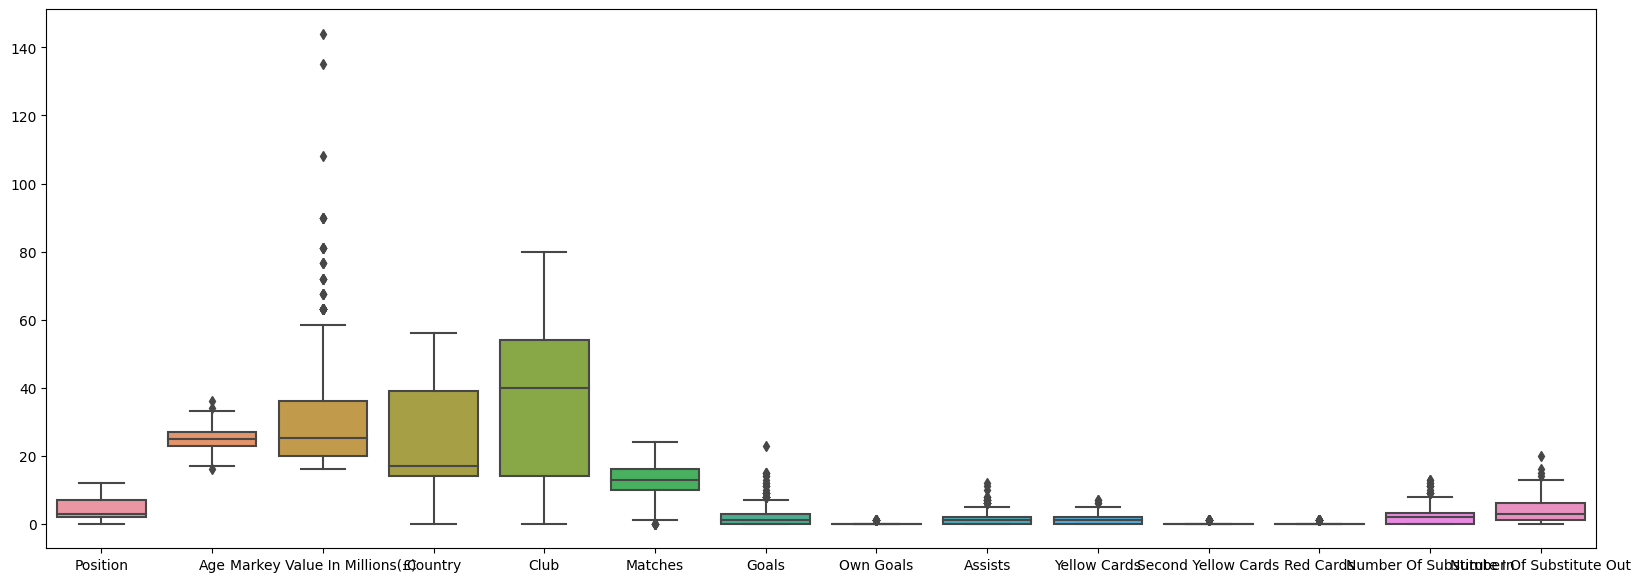

In [13]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [14]:
numeric_df=df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
'Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Markey Value In Millions(£)']]

In [15]:
# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = numeric_df.columns
d = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£)
0,0.30,0.666667,0.304348,0.0,0.916667,0.428571,0.0,0.0,0.000000,0.40,1.000000
1,0.25,0.416667,0.565217,0.0,0.333333,0.142857,0.0,0.0,0.000000,0.05,0.929577
2,0.60,0.666667,0.304348,0.0,0.166667,0.285714,0.0,0.0,0.153846,0.10,0.718310
3,0.50,0.625000,0.086957,0.0,0.250000,0.142857,0.0,0.0,0.153846,0.40,0.577465
4,0.65,0.625000,0.652174,0.0,0.500000,0.142857,0.0,0.0,0.000000,0.15,0.577465


<Axes: >

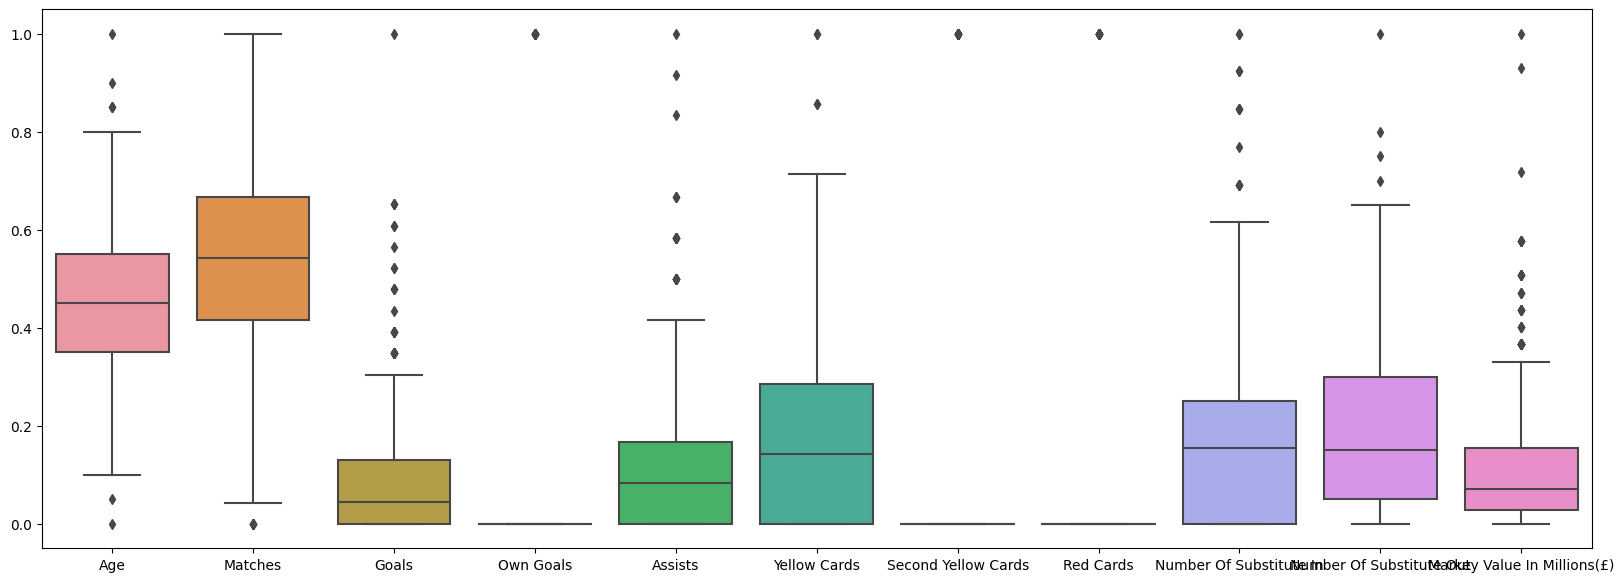

In [16]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=scaled_df)

In [17]:
scaled_df.corr()


,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£)
Age,1.000000,-0.029396,0.056607,0.038849,-0.041616,-0.059783,-0.055751,-0.012872,-0.135682,-0.110354,0.047794
Matches,-0.029396,1.000000,0.368270,0.037999,0.407905,0.409519,-0.000317,0.019569,0.224711,0.477138,0.112774
Goals,0.056607,0.368270,1.000000,-0.091276,0.472086,0.024856,-0.055523,-0.022166,0.084144,0.437487,0.213461
Own Goals,0.038849,0.037999,-0.091276,1.000000,-0.092988,0.057804,-0.033985,-0.038617,-0.041531,-0.096794,-0.032827
Assists,-0.041616,0.407905,0.472086,-0.092988,1.000000,0.133521,-0.041855,0.001155,0.083829,0.452794,0.228183
Yellow Cards,-0.059783,0.409519,0.024856,0.057804,0.133521,1.000000,0.076899,0.088482,-0.065864,0.133355,0.003802
Second Yellow Cards,-0.055751,-0.000317,-0.055523,-0.033985,-0.041855,0.076899,1.000000,0.060064,-0.077221,-0.066548,0.041953
Red Cards,-0.012872,0.019569,-0.022166,-0.038617,0.001155,0.088482,0.060064,1.000000,-0.030601,-0.006129,0.001485
Number Of Substitute In,-0.135682,0.224711,0.084144,-0.041531,0.083829,-0.065864,-0.077221,-0.030601,1.000000,0.247122,-0.085958
Number Of Substitute Out,-0.110354,0.477138,0.437487,-0.096794,0.452794,0.133355,-0.066548,-0.006129,0.247122,1.000000,0.000946


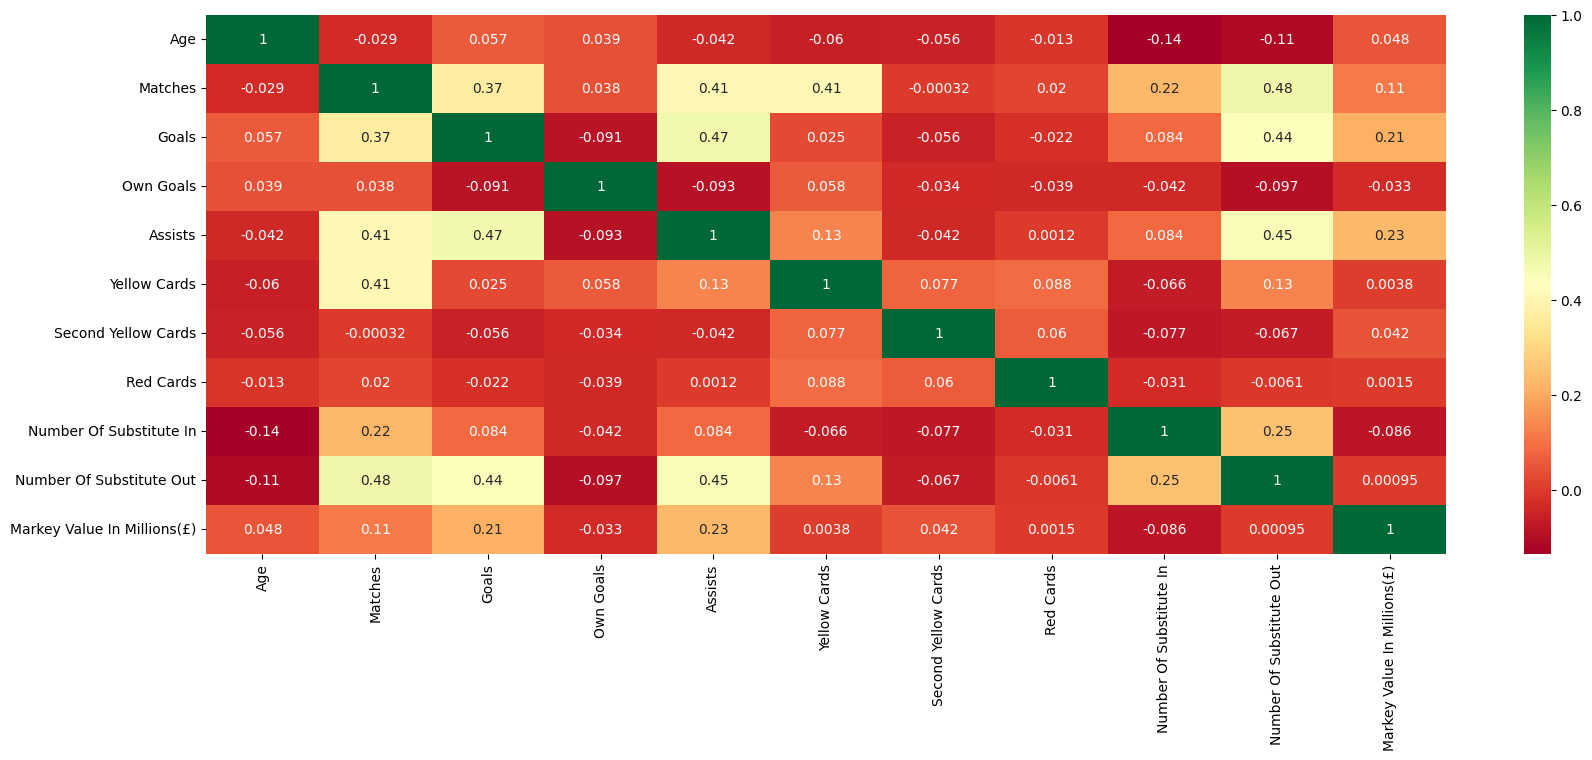

In [18]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(scaled_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

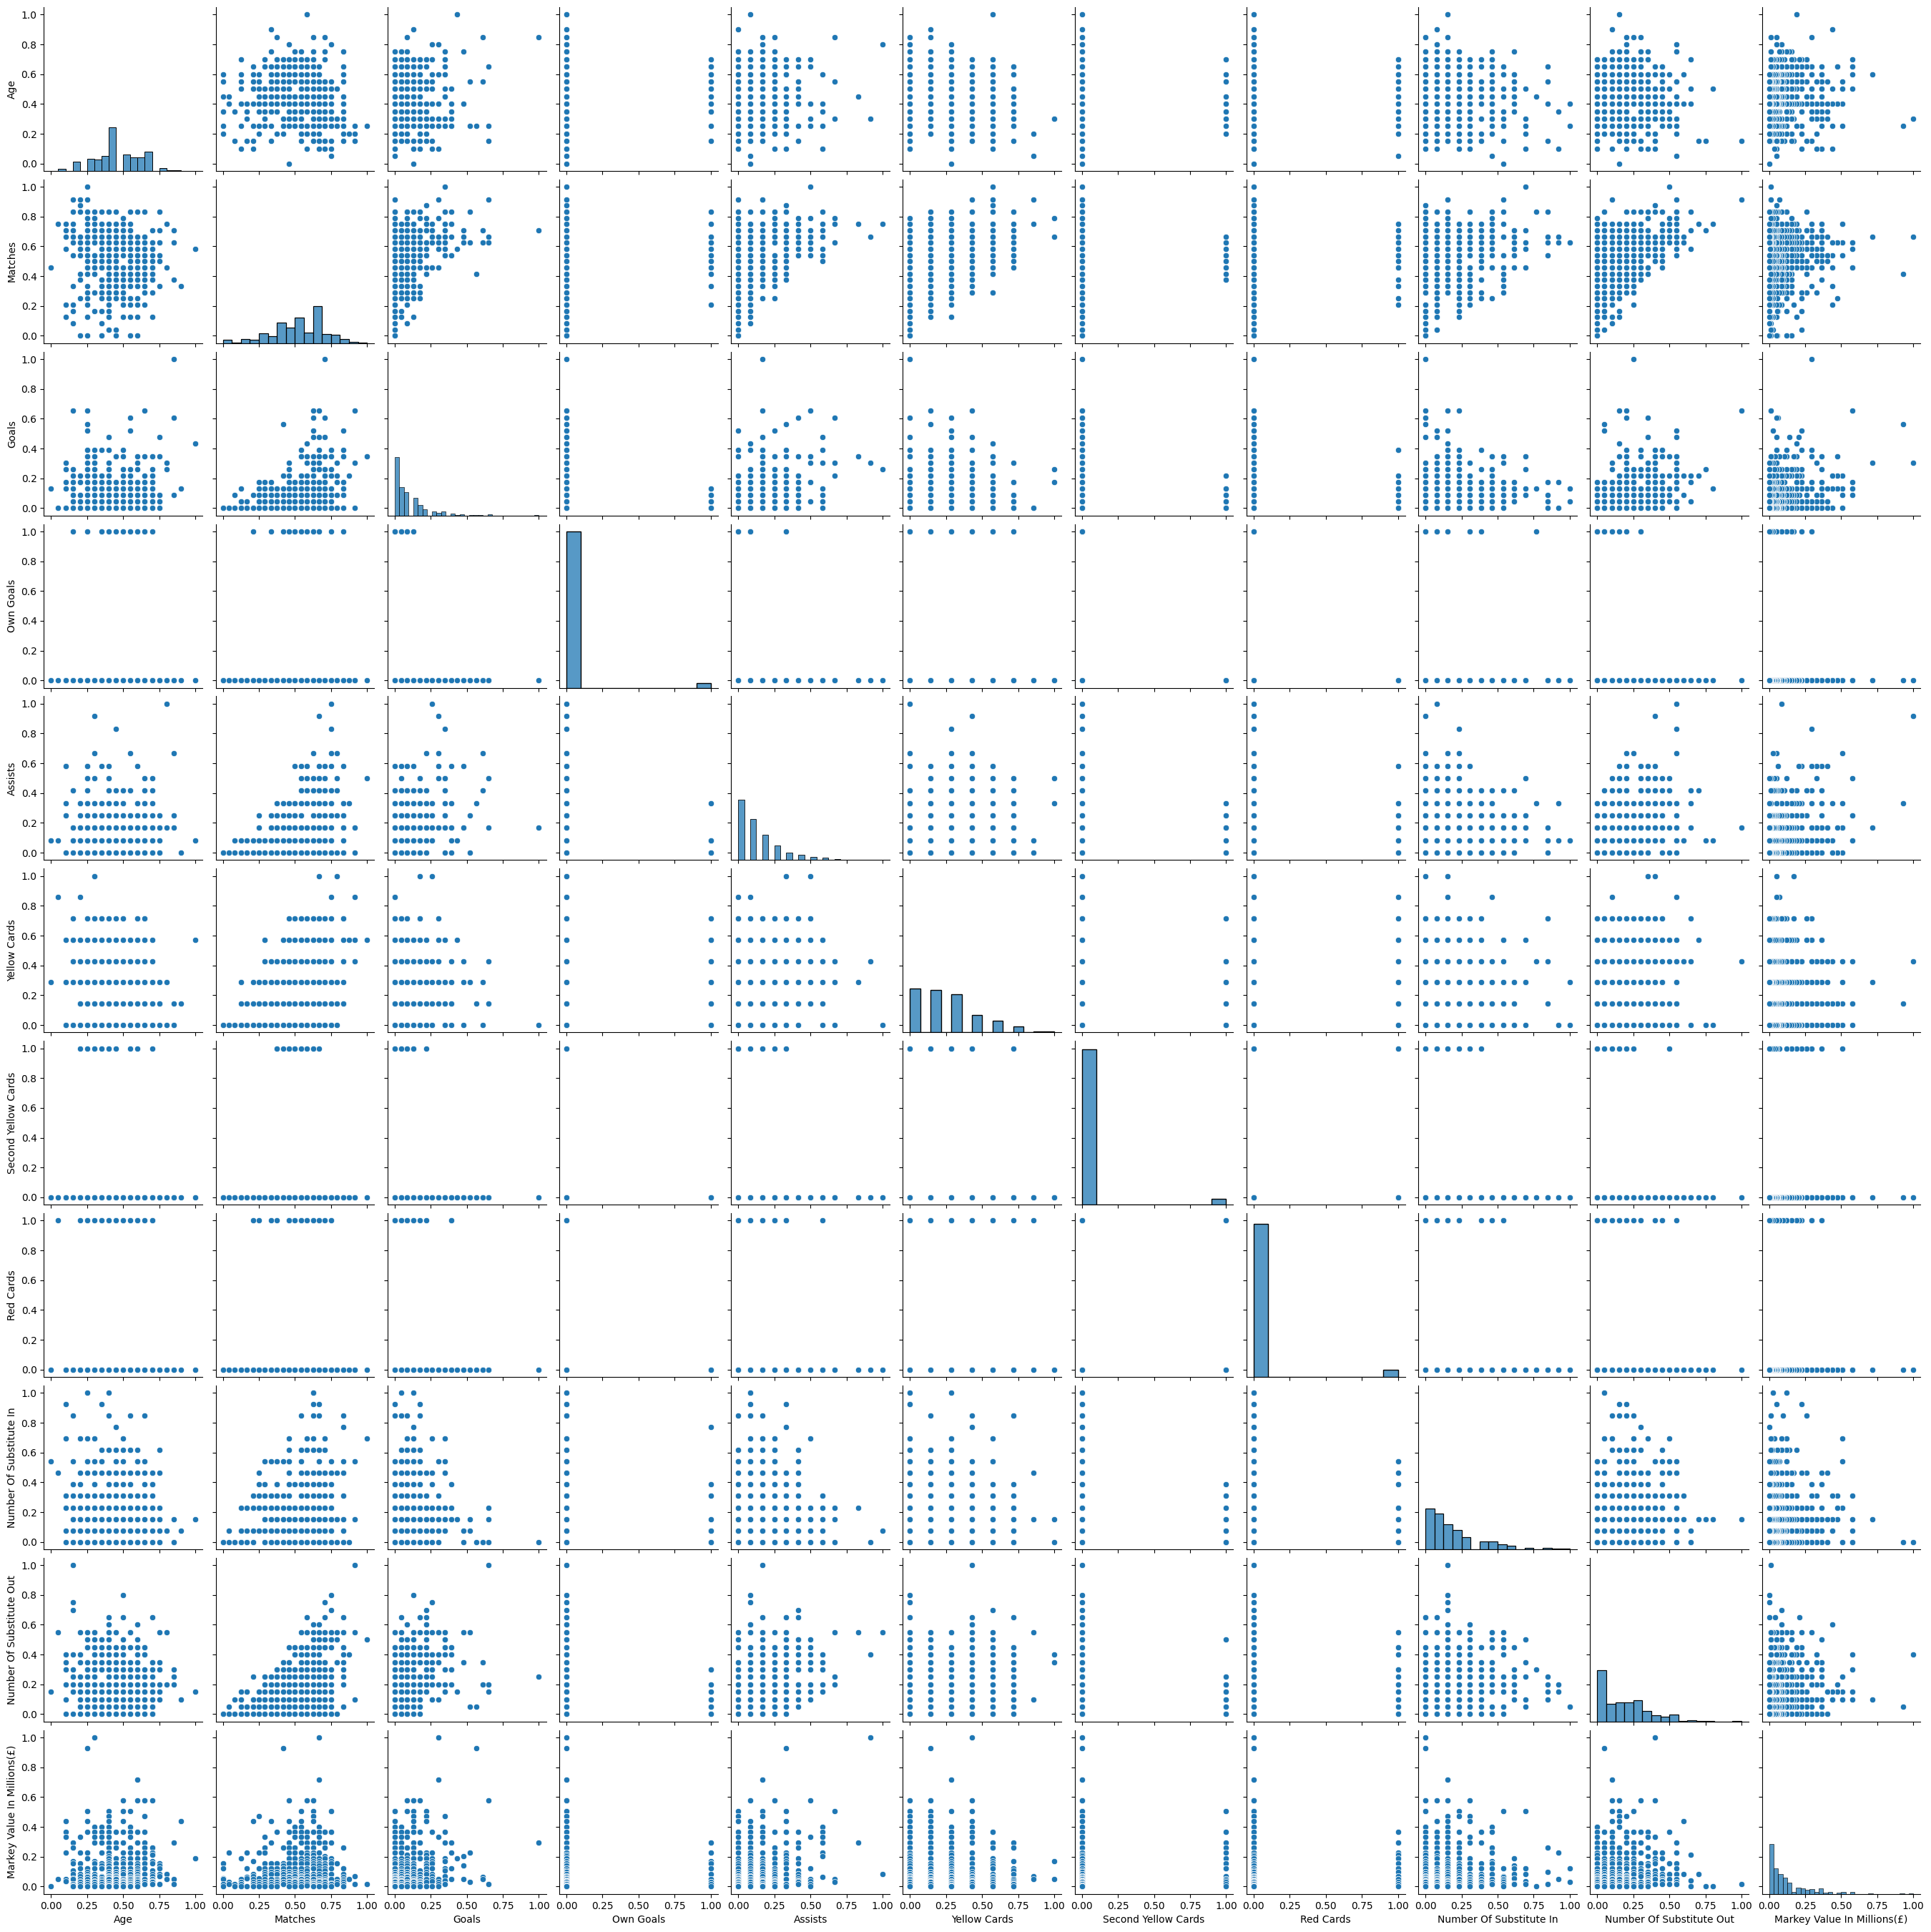

In [19]:
sns.pairplot(scaled_df) 


# Independent variables that are useful to predict a target

In [23]:
X = df.drop("Markey Value In Millions(£)", axis=1)
y = df["Markey Value In Millions(£)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# Create and fit the Random Forest model
rf = RandomForestRegressor(max_depth=30, random_state=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=5)

In [25]:
sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[sfm.get_support()]
selected_features

Index(['Position', 'Age', 'Country', 'Club', 'Matches', 'Goals', 'Assists',
       'Number Of Substitute In', 'Number Of Substitute Out'],
      dtype='object')

In [26]:


univariate = SelectKBest(k=10)
univariate.fit(X_train, y_train)

# Print the results of the feature selection methods
print("Univariate Selection: ", univariate.get_support())

temp_df = pd.DataFrame()
temp_df['columns'] = X_train.columns
temp_df['values'] = univariate.get_support()
temp_df[temp_df["values"]==True]['columns']

Univariate Selection:  [False  True  True  True  True  True False  True  True False  True  True
  True]


1                          Age
2                      Country
3                         Club
4                      Matches
5                        Goals
7                      Assists
8                 Yellow Cards
10                   Red Cards
11     Number Of Substitute In
12    Number Of Substitute Out
Name: columns, dtype: object

In [27]:
# Create and fit the Random Forest model
rf = RandomForestRegressor(max_depth=30, random_state=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=5)

In [28]:
# Obtain the feature importances from the model
importances = rf.feature_importances_

# Sort the feature importances in descending order and obtain the indices
indices = np.argsort(importances)[::-1]

# Print the feature names and their importances
print("Feature importances:")
for i in range(X_train.shape[1]):
    print("{0}: {1}".format(X_train.columns[indices[i]], importances[indices[i]]))

Feature importances:
Club: 0.16813569632920627
Assists: 0.15845277686232032
Country: 0.10494221313984554
Age: 0.10025259679943337
Number Of Substitute Out: 0.09638823611905634
Goals: 0.08930930197090617
Matches: 0.08907527147254062
Number Of Substitute In: 0.0682423481645676
Position: 0.06381826629862118
Yellow Cards: 0.041242329390365914
Second Yellow Cards: 0.010876107211608454
Red Cards: 0.006895268639600157
Own Goals: 0.002369587601928268


In this code, we start by loading the dataset and splitting it into training and testing sets. Then, we create and fit a Random Forest model to the training data. The feature importances are obtained from the model using the feature_importances_ attribute, which gives the relative importance of each feature in the model. Finally, we sort the feature importances in descending order and print their names and values.

#Identifying Predictor significance

In [29]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Markey Value In Millions(£)'], data[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
                      'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Markey Value In Millions(£)   R-squared (uncentered):                   0.782
Model:                                     OLS   Adj. R-squared (uncentered):              0.777
Method:                          Least Squares   F-statistic:                              175.6
Date:                         Fri, 07 Apr 2023   Prob (F-statistic):                   6.15e-155
Time:                                 03:41:14   Log-Likelihood:                         -2122.0
No. Observations:                          500   AIC:                                      4264.
Df Residuals:                              490   BIC:                                      4306.
Df Model:                                   10                                                  
Covariance Type:                     nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.9677      0.087     11.140      0.000       0.797       1.138
Matches                      0.5731      0.228      2.515      0.012       0.125       1.021
Goals                        0.8856      0.320      2.771      0.006       0.258       1.513
Own Goals                   -2.3497      4.545     -0.517      0.605     -11.280       6.580
Assists                      1.9775      0.503      3.935      0.000       0.990       2.965
Yellow Cards                -0.5002      0.598     -0.836      0.403      -1.675       0.675
Second Yellow Cards          5.5116      4.128      1.335      0.182      -2.599      13.623
Red Cards                    0.3583      3.660      0.098      0.922      -6.833       7.550
Number Of Substitute In     -0.4566      0.320     -1.426      0.155      -1.086       0.173
Number Of Substitute Out    -0.8579      0.292     -2.936      0.003      -1.432      -0.284
==============================================================================
Omnibus:                      179.535   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              621.554
Skew:                           1.658   Prob(JB):                    1.07e-135
Kurtosis:                       7.340   Cond. No.                         172.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From above you can see significant features

#Ranges of Predictor variables

In [30]:
df.describe()


,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.444000,24.968000,31.537800,24.13400,36.880000,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,3.555862,3.165916,17.577697,15.73172,23.190887,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,0.000000,16.000000,16.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,19.800000,14.00000,14.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,25.000000,25.200000,17.00000,40.000000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,7.000000,27.000000,36.000000,39.00000,54.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,12.000000,36.000000,144.000000,56.00000,80.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


#Distribution of predictor variables

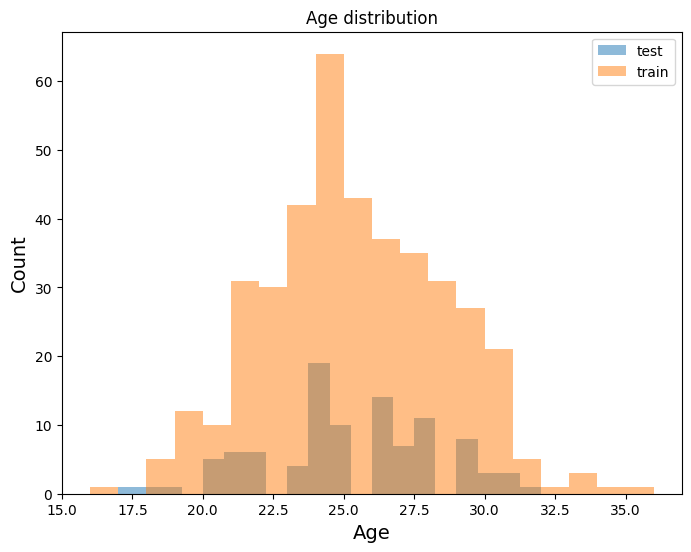

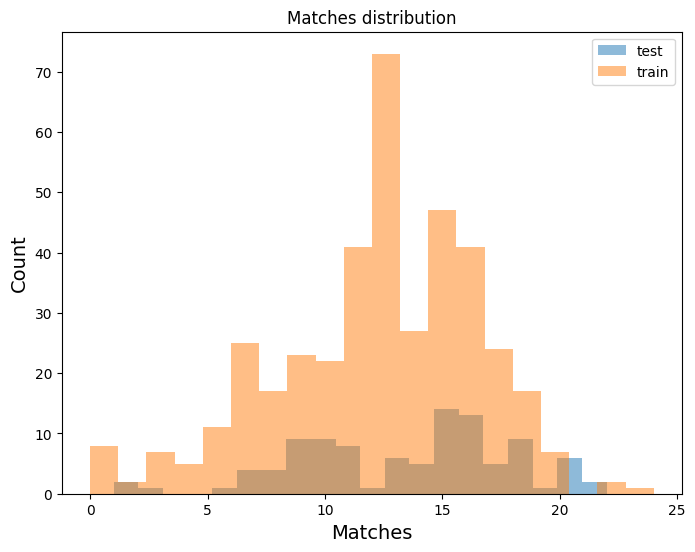

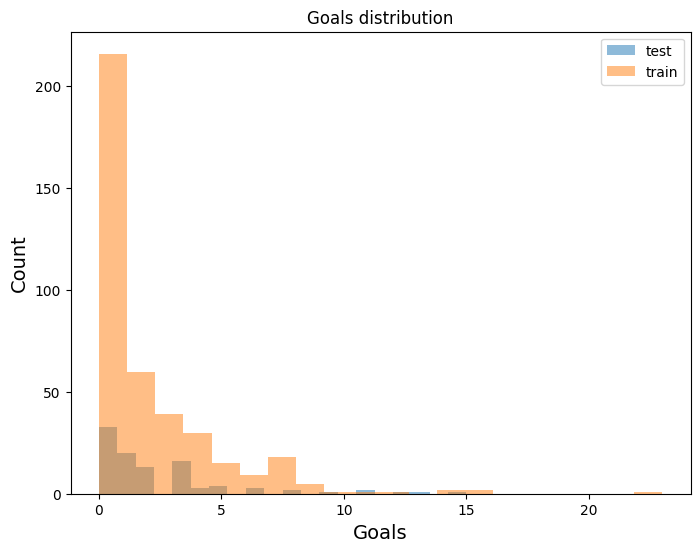

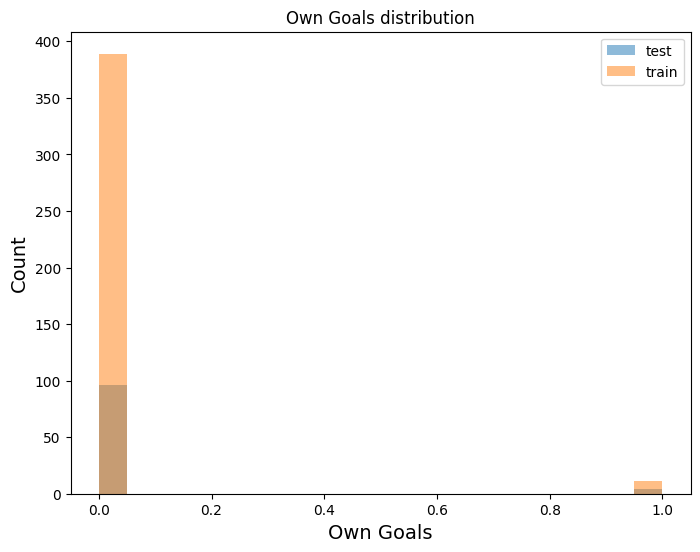

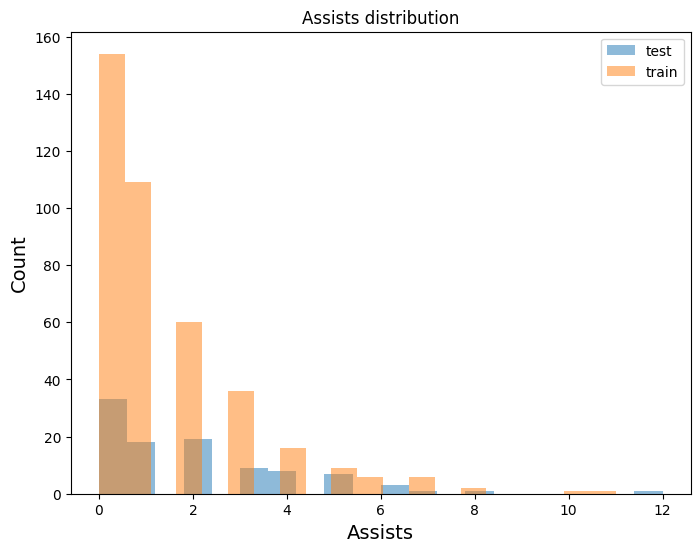

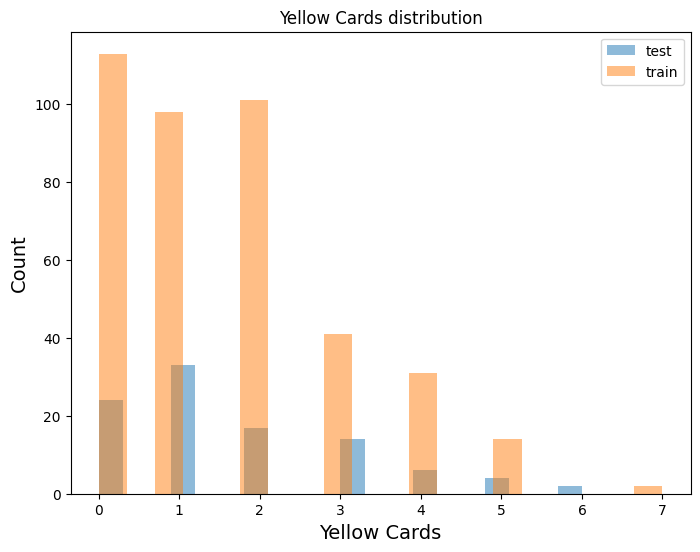

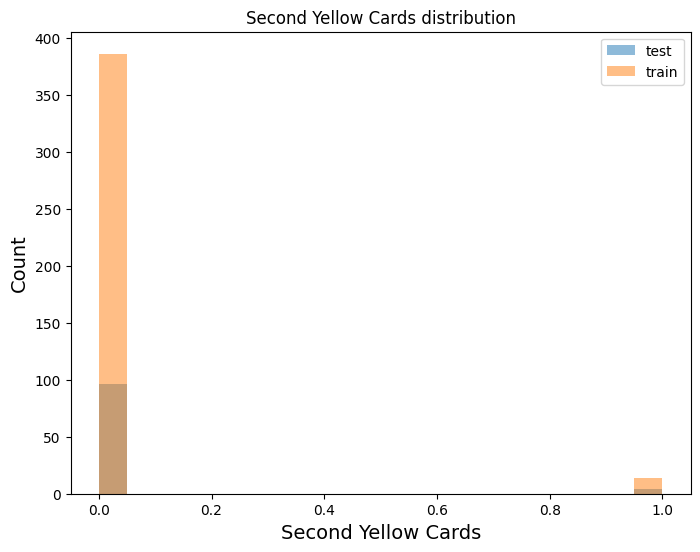

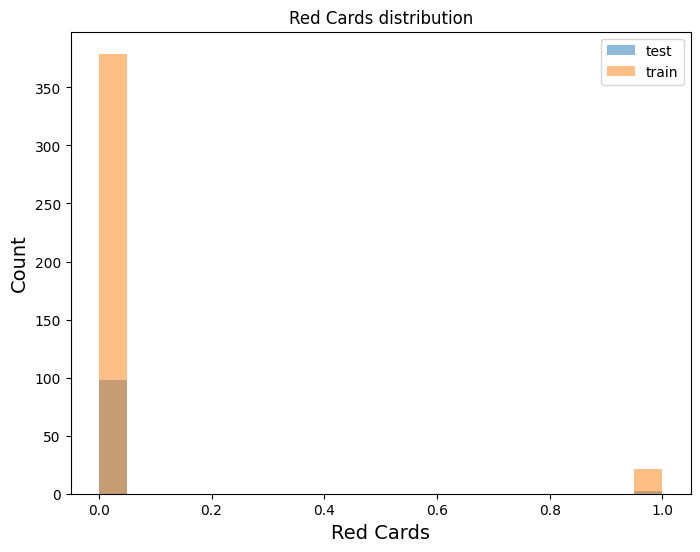

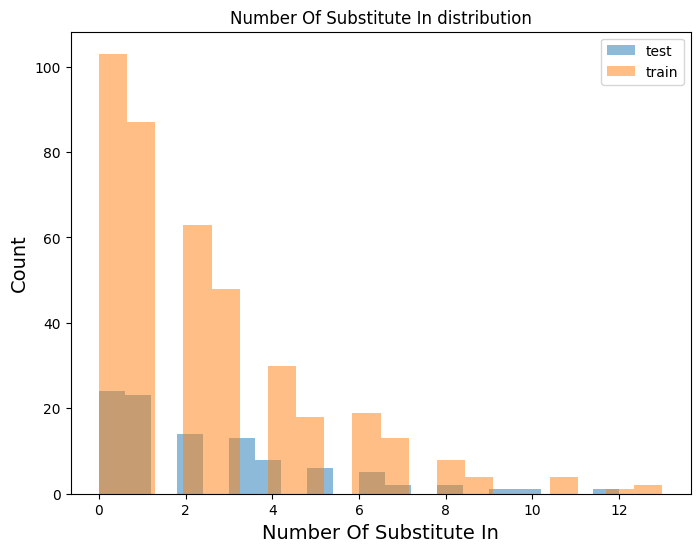

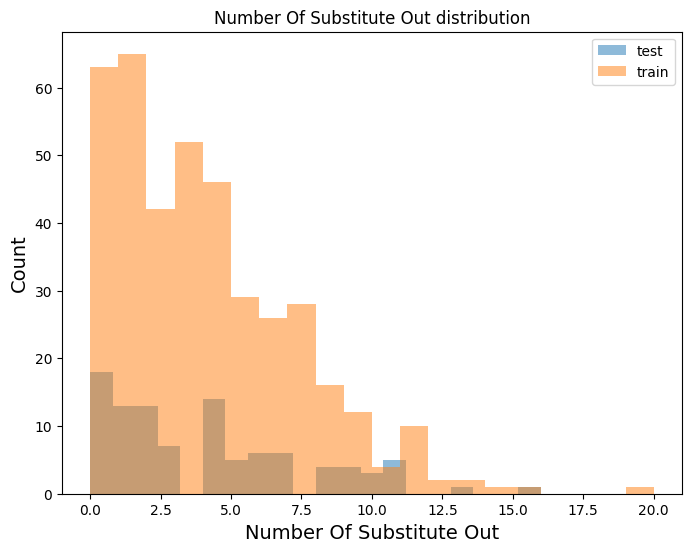

In [31]:
X_test_plot = X_test[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
                      'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]


X_train_plot = X_train[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
                      'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

# WITHOUT OUTLIERS

In [32]:
#with outliers

regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Coefficient of determination: 0.12
R^2 score on tarining set = 0.11520593264113499


# REMOVE OUTLIERS

In [33]:
z_score = (scaled_df - scaled_df.mean()) / scaled_df.std()
z_score

,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£)
0,-0.937485,0.829946,1.680496,-0.175687,5.121007,0.974000,-0.193054,-0.219366,-0.950821,1.292420,6.398005
1,-1.253350,-0.551762,3.763755,-0.175687,1.342861,-0.409523,-0.193054,-0.219366,-0.950821,-0.833271,5.885993
2,0.957701,0.829946,1.680496,-0.175687,0.263391,0.282239,-0.193054,-0.219366,-0.156484,-0.529601,4.349956
3,0.325972,0.599661,-0.055554,-0.175687,0.803126,-0.409523,-0.193054,-0.219366,-0.156484,1.292420,3.325931
4,1.273565,0.599661,4.458175,-0.175687,2.422331,-0.409523,-0.193054,-0.219366,-0.950821,-0.225931,3.325931
...,...,...,...,...,...,...,...,...,...,...,...
495,0.641836,-2.854608,-0.749973,-0.175687,-0.816080,-1.101284,-0.193054,-0.219366,-0.950821,-1.136941,-0.872572
496,0.957701,-1.012331,-0.402763,-0.175687,0.803126,-1.101284,-0.193054,4.549467,-0.156484,0.381410,-0.872572
497,-0.305757,-1.703185,-0.749973,-0.175687,-0.816080,-1.101284,-0.193054,-0.219366,-0.950821,-1.136941,-0.872572
498,0.010108,-1.012331,-0.749973,-0.175687,-0.816080,0.282239,-0.193054,-0.219366,-0.950821,-0.529601,-0.872572


In [34]:
outliers = scaled_df[abs(z_score) > 3]

In [35]:
data_without_outliers = pd.DataFrame(scaled_df[abs(z_score) <= 3].copy())

In [36]:
data_without_outliers.dropna(axis=0, how='any', inplace=True)

In [37]:
X = data_without_outliers.drop("Markey Value In Millions(£)", axis=1)
y = data_without_outliers["Markey Value In Millions(£)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Coefficient of determination: 0.03
R^2 score on tarining set = 0.025689431303901444


As you can see from R^2 model performed better with outliers

# Remove 1%, 5%, and 10% of your data randomly

In [38]:

def create_random_data(data, fraction):
  df1 = data.copy()
  random_integers = random.sample(range(0, len(df1)), int(fraction*len(df1)))
  for i in random_integers:
    df1.iloc[i] = np.nan
  df1.columns = data.columns
  return df1

In [39]:
def linear_reg(data):
  X = data.drop("Markey Value In Millions(£)", axis=1)
  y = data["Markey Value In Millions(£)"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  reg = LinearRegression().fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = reg.predict(X_test)

  # Calculate the MSE between the actual and predicted values
  mse = mean_squared_error(y_test, y_pred)

  # Calculate the mean squared error of the residuals
  residual_mse = mean_squared_error(y_test, y_pred - y_test)

  # Calculate the bias and variance of the error
  bias = mse - residual_mse
  variance = residual_mse

  return mse, residual_mse, bias, variance

In [40]:
mse, residual_mse, bias, variance = linear_reg(df)
mse, residual_mse, bias, variance

(308.813972907369, 1977.485251752618, -1668.6712788452492, 1977.485251752618)

# MEAN Imputation

In [41]:
data_1percent_removed = create_random_data(df, 0.01)
mean_imp1 = SimpleImputer(strategy='mean')
df_mean_1percent = mean_imp1.fit_transform(data_1percent_removed)
df_mean_1percent = pd.DataFrame(df_mean_1percent, columns=data_1percent_removed.columns)
linear_reg(df_mean_1percent)

(308.38464996948073,
 1974.0183304421034,
 -1665.6336804726227,
 1974.0183304421034)

In [42]:
data_5percent_removed = create_random_data(df, 0.05)
mean_imp5 = SimpleImputer(strategy='mean')
df_mean_5percent = mean_imp5.fit_transform(data_5percent_removed)
df_mean_5percent = pd.DataFrame(df_mean_5percent, columns=data_5percent_removed.columns)
linear_reg(df_mean_5percent)

(287.8425263022082, 1914.621385309349, -1626.778859007141, 1914.621385309349)

In [43]:
data_10percent_removed = create_random_data(df, 0.10)
mean_imp10 = SimpleImputer(strategy='mean')
df_mean_10percent = mean_imp10.fit_transform(data_10percent_removed)
df_mean_10percent = pd.DataFrame(df_mean_10percent, columns=data_10percent_removed.columns)
linear_reg(df_mean_10percent)

(284.5605312717114, 2078.84329720492, -1794.2827659332086, 2078.84329720492)

# Median Imputation

In [44]:
data_1percent_removed = create_random_data(df, 0.01)
median_imp1 = SimpleImputer(strategy='median')
df_median_1percent = median_imp1.fit_transform(data_1percent_removed)
df_median_1percent = pd.DataFrame(df_median_1percent, columns=data_1percent_removed.columns)
linear_reg(df_median_1percent)

(303.3928592654721,
 1877.0898671385355,
 -1573.6970078730633,
 1877.0898671385355)

In [45]:
data_5percent_removed = create_random_data(df, 0.05)
median_imp5 = SimpleImputer(strategy='median')
df_median_5percent = median_imp5.fit_transform(data_5percent_removed)
df_median_5percent = pd.DataFrame(df_median_5percent, columns=data_5percent_removed.columns)
linear_reg(df_median_5percent)

(305.3986294624613,
 1969.9563395594628,
 -1664.5577100970015,
 1969.9563395594628)

In [46]:
data_10percent_removed = create_random_data(df, 0.10)
median_imp10 = SimpleImputer(strategy='median')
df_median_10percent = median_imp10.fit_transform(data_10percent_removed)
df_median_10percent = pd.DataFrame(df_median_10percent, columns=data_10percent_removed.columns)
linear_reg(df_median_10percent)

(293.85326956387667, 1904.672604665042, -1610.8193351011653, 1904.672604665042)

# KNN Imputation

In [47]:
data_1percent_removed = create_random_data(df, 0.01)
knn_imp1 = KNNImputer()
df_knn_1percent = knn_imp1.fit_transform(data_1percent_removed)
df_knn_1percent = pd.DataFrame(df_knn_1percent, columns=data_1percent_removed.columns)
linear_reg(df_knn_1percent)

(304.8248249977457,
 1991.0053504570576,
 -1686.1805254593119,
 1991.0053504570576)

In [48]:
data_5percent_removed = create_random_data(df, 0.05)
knn_imp5 = KNNImputer()
df_knn_5percent = knn_imp1.fit_transform(data_5percent_removed)
df_knn_5percent = pd.DataFrame(df_knn_5percent, columns=data_5percent_removed.columns)
linear_reg(df_knn_5percent)

(308.36963471952913,
 1945.0747777730699,
 -1636.7051430535407,
 1945.0747777730699)

In [49]:
data_10percent_removed = create_random_data(df, 0.10)
knn_imp10 = KNNImputer()
df_knn_10percent = knn_imp10.fit_transform(data_10percent_removed)
df_knn_10percent = pd.DataFrame(df_knn_10percent, columns=data_10percent_removed.columns)
linear_reg(df_knn_10percent)

(249.549914650457, 1675.4965145498488, -1425.946599899392, 1675.4965145498488)

#ANSWER QUESTIONS

* What are the data types? (Only numeric and categorical)
NUMERIC:'Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
'Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Markey Value In Millions(£)'

CATEGORICAL:'Position','Country','Club'

* Are there missing values?
NO,They aren't any missing values.

* What are the likely distributions of the numeric variables?
QQ-PLOT, BOX PLOT.


* Which independent variables have missing data? How much? 
No, They aren't any missing values


* Do the training and test sets have the same data?
Yes, they share the same data but have different distribution but depending on the requirement the distributions can be made same using the stratify parameter in the method. 


* In the predictor variables independent of all the other predictor variables?
 No. There are independent variables that have correlation with other predictor variables as can be seen from the correlation matrix.


* Do the ranges of the predictor variables make sense?
Yes, They make sense




#Licensing

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#REFERENCES


"Data Cleaning Challenge: How to Handle Missing Values" by Kaggle

"Feature Selection for Machine Learning" by Jason Brownlee

"Multiple Imputation" by Donald Rubin
"Dealing with Missing Values" by Kaggle


"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron

"Linear Regression" by Christopher James


"Data Exploration" by Kelleher, Mac Namee, and D'Arcy


"Exploratory Data Analysis" by John Tukey


"Outlier Analysis" by Aggarwal


"Anomaly Detection" by Chandola, Banerjee, and Kumar


"Dealing with Missing Values" by Kaggle.